In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


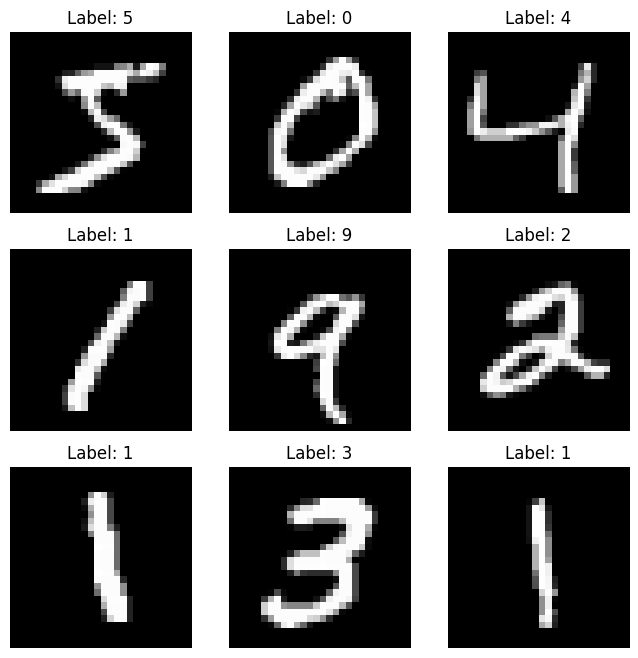

In [3]:
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')

plt.show()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("New training shape:", x_train.shape)

New training shape: (60000, 28, 28, 1)


In [7]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [8]:
model = models.Sequential()

# First Convolution Layer
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))

model.summary()

C:\Users\KIIT0001\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.8824 - loss: 0.3708 - val_accuracy: 0.9818 - val_loss: 0.0612
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.9811 - loss: 0.0597 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 56ms/step - accuracy: 0.9883 - loss: 0.0365 - val_accuracy: 0.9875 - val_loss: 0.0448
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 146s 59ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9881 - val_loss: 0.0447
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 122s 45ms/step - accuracy: 0.9943 - loss: 0.0170 - val_accuracy: 0.9899 - val_loss: 0.0359
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9888 - val_loss: 0.0438
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 102s 60ms/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9903 - val_loss: 0.0401
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 55ms/step - accuracy: 0.9

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)

print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9872 - loss: 0.0478
Test Accuracy: 0.9901000261306763


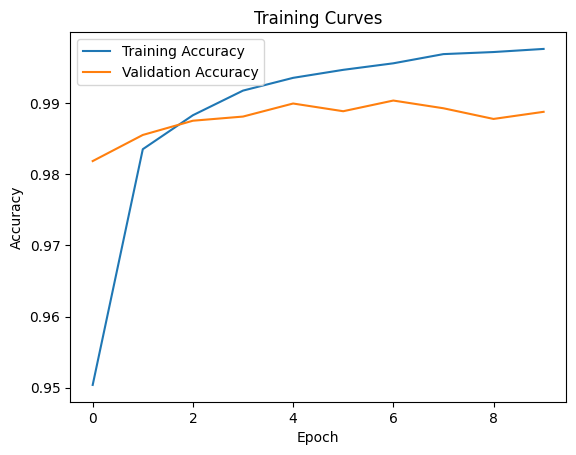

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Curves")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


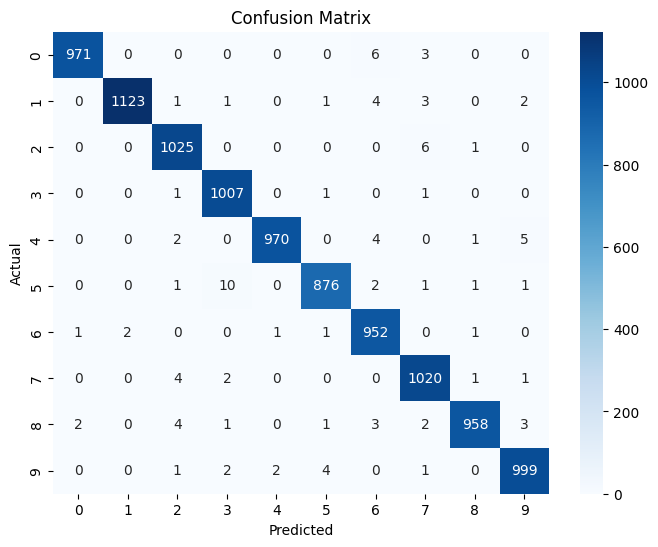

In [13]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted: 1


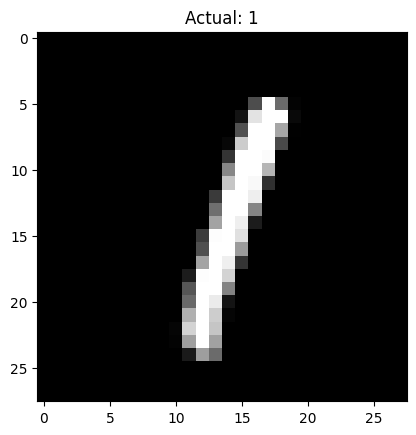

In [14]:
index = 5

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual: " + str(y_test[index]))

prediction = model.predict(x_test[index].reshape(1,28,28,1))
print("Predicted:", np.argmax(prediction))